<a href="https://colab.research.google.com/github/kanekiken1234/DFD-CNN/blob/main/DFD_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras-vggface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip list -v

Package                       Version                Location                               Installer
----------------------------- ---------------------- -------------------------------------- ---------
absl-py                       1.3.0                  /usr/local/lib/python3.7/dist-packages pip
aeppl                         0.0.33                 /usr/local/lib/python3.7/dist-packages pip
aesara                        2.7.9                  /usr/local/lib/python3.7/dist-packages pip
aiohttp                       3.8.3                  /usr/local/lib/python3.7/dist-packages pip
aiosignal                     1.3.1                  /usr/local/lib/python3.7/dist-packages pip
alabaster                     0.7.12                 /usr/local/lib/python3.7/dist-packages pip
albumentations                1.2.1                  /usr/local/lib/python3.7/dist-packages pip
altair                        4.2.0                  /usr/local/lib/python3.7/dist-packages pip
appdirs                     

In [ ]:
!pip install keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.5 MB/s 


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
import copy
import numpy as np

from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, Dropout, Activation, Lambda, Permute, Reshape
from keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D
from keras_vggface.vggface import VGGFace
from keras_vggface import utils
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
import pandas as pd
import cv2
import scipy.misc
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
 !pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"user47","key":"ba9c751c3d0cd4ac77d0c8cc4ef903ff"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d xhlulu/140k-real-and-fake-faces

100% 3.75G/3.75G [02:41<00:00, 26.6MB/s]
100% 3.75G/3.75G [02:41<00:00, 25.0MB/s]


In [ ]:
! ls

140k-real-and-fake-faces.zip  kaggle.json  sample_data


In [ ]:
! unzip 140k-real-and-fake-faces.zip -d 140k-real-and-fake-faces

Streaming output truncated to the last 5000 lines.
  inflating: 140k-real-and-fake-faces/real_vs_fake/real-vs-fake/valid/real/34832.jpg  
  inflating: 140k-real-and-fake-faces/real_vs_fake/real-vs-fake/valid/real/34836.jpg  
  inflating: 140k-real-and-fake-faces/real_vs_fake/real-vs-fake/valid/real/34839.jpg  
  inflating: 140k-real-and-fake-faces/real_vs_fake/real-vs-fake/valid/real/34847.jpg  
  inflating: 140k-real-and-fake-faces/real_vs_fake/real-vs-fake/valid/real/34848.jpg  
  inflating: 140k-real-and-fake-faces/real_vs_fake/real-vs-fake/valid/real/34852.jpg  
  inflating: 140k-real-and-fake-faces/real_vs_fake/real-vs-fake/valid/real/34861.jpg  
  inflating: 140k-real-and-fake-faces/real_vs_fake/real-vs-fake/valid/real/34864.jpg  
  inflating: 140k-real-and-fake-faces/real_vs_fake/real-vs-fake/valid/real/34868.jpg  
  inflating: 140k-real-and-fake-faces/real_vs_fake/real-vs-fake/valid/real/34877.jpg  
  inflating: 140k-real-and-fake-faces/real_vs_fake/real-vs-fake/valid/real/3488

In [ ]:
base_path = '/content/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/'
image_gen = ImageDataGenerator(rescale=1./255.)
batch_size = 64
train_flow = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)
valid_flow = image_gen.flow_from_directory(
    base_path + 'valid/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)
test_flow = image_gen.flow_from_directory(
    base_path + 'test/',
    target_size=(224, 224),
    batch_size=1,
    shuffle=False,
    class_mode='binary'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [ ]:
import tensorflow

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
#from keras.layers.normalization import BatchNormalization
from keras.layers.normalization.batch_normalization import BatchNormalization
"""
    Propsoed CNN architecture.
    
"""

model = Sequential()

# Pamameters Initialization
input_shape = (224,224,3)
activation = 'relu'
padding = 'same'
droprate = 0.1
epsilon=0.001

model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))
model.add(Conv2D(filters=16, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))


model.add(Conv2D(filters=32, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=128, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=256, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=512, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(GlobalAveragePooling2D())
#model.add(Flatten())
#model.add(Dense(256, kernel_initializer='glorot_normal', activation='relu'))
#model.add(Dropout(0.5))
          
#model.add(Dense(128, kernel_initializer='glorot_normal', activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dropout(droprate))
model.add(Dense(1, activation='sigmoid'))

model.summary() # Summary of the architecture

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 224, 224, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 16)     64        
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                      

In [ ]:
# Parameters Initialization
from keras.optimizers import RMSprop,SGD,Adam,Adadelta

#opt = rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='binary_crossentropy',optimizer=Adam(0.0001), metrics=['accuracy'])

In [31]:
train_steps = 40000//batch_size
valid_steps = 5000//batch_size
history = model.fit_generator(
    train_flow,
    epochs=10,
    steps_per_epoch = train_steps,
    validation_data = valid_flow,
    validation_steps = valid_steps
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
625/625 [==============================] - 3904s 6s/step - loss: 0.5621 - accuracy: 0.7053 - val_loss: 0.5312 - val_accuracy: 0.7364
Epoch 2/10
625/625 [==============================] - 3917s 6s/step - loss: 0.4593 - accuracy: 0.7824 - val_loss: 0.6958 - val_accuracy: 0.6725
Epoch 3/10
625/625 [==============================] - 3923s 6s/step - loss: 0.3915 - accuracy: 0.8225 - val_loss: 0.6949 - val_accuracy: 0.6969
Epoch 4/10
625/625 [==============================] - 3989s 6s/step - loss: 0.3358 - accuracy: 0.8551 - val_loss: 0.5989 - val_accuracy: 0.7372
Epoch 5/10
625/625 [==============================] - 3895s 6s/step - loss: 0.2971 - accuracy: 0.8747 - val_loss: 0.4929 - val_accuracy: 0.7762
Epoch 6/10
625/625 [==============================] - 3917s 6s/step - loss: 0.2615 - accuracy: 0.8909 - val_loss: 0.5173 - val_accuracy: 0.7827
Epoch 7/10
625/625 [==============================] - 3913s 6s/step - loss: 0.2282 - accuracy: 0.9058 - val_loss: 0.3133 - val_accuracy:

In [33]:
model

In [34]:
"""
Plot the training and validation loss
epochs - list of epoch numbers
loss - training loss for each epoch
val_loss - validation loss for each epoch
"""
def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
"""
Plot the training and validation accuracy
epochs - list of epoch numbers
acc - training accuracy for each epoch
val_acc - validation accuracy for each epoch
"""
def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label = 'Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

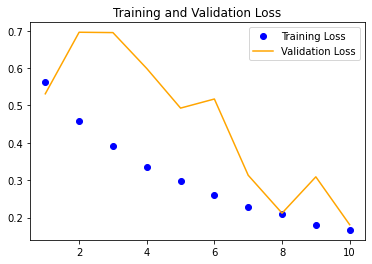

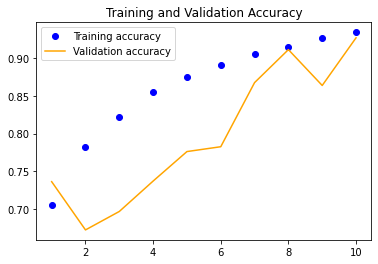

In [36]:
plot_loss(range(1, len(loss) + 1), loss, val_loss)
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)

In [37]:
y_pred = model.predict(test_flow)
y_test = test_flow.classes

20000/20000 [==============================] - 739s 37ms/step


In [58]:
from sklearn import metrics
print("ROC AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))
print()
print(metrics.classification_report(y_test, y_pred > 0.5))

ROC AUC Score: 0.986429605
AP Score: 0.9856264908520537

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     10000
           1       0.97      0.88      0.92     10000

    accuracy                           0.92     20000
   macro avg       0.93      0.92      0.92     20000
weighted avg       0.93      0.92      0.92     20000



In [38]:
model.save("custom_model.h5") # save model

In [41]:
from tensorflow.keras.preprocessing import image

In [70]:
def ImagePrediction(loc):
    test_image = image.load_img(loc, target_size = (224,224))
    plt.axis('off')
    plt.imshow(test_image)
    test_image = image.img_to_array(test_image)
    # test_image = np.expand_dims(test_image)
    test_image = np.array([test_image])
    normalizedData = (test_image-np.min(test_image))/(np.max(test_image)-np.min(test_image))
    result = model.predict(normalizedData)
    print(result)
    if round(result[0][0]) == 1:
        predictions = 'Real'
    else:
        predictions = 'Fake'
    print('Prediction: ',predictions)

1/1 [==============================] - 0s 59ms/step
[[0.9789952]]
Prediction:  Real


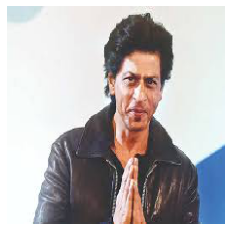

In [71]:
test_image_1 = ImagePrediction("check.jpg")

1/1 [==============================] - 0s 80ms/step
[[0.97921556]]
Prediction:  Real


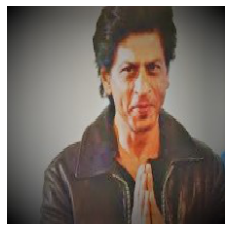

In [72]:
test_image_2 = ImagePrediction("check2.jpg")

1/1 [==============================] - 0s 53ms/step
[[0.9998775]]
Prediction:  Real


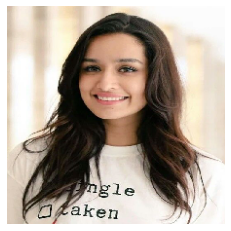

In [73]:
test_image_1 = ImagePrediction("check3.jpg")


1/1 [==============================] - 0s 52ms/step
[[0.99261487]]
Prediction:  Real


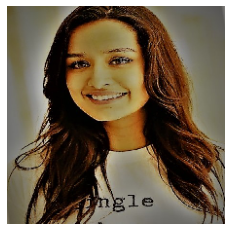

In [74]:
test_image_1 = ImagePrediction("check4.jpg")


1/1 [==============================] - 0s 56ms/step
[[0.9980396]]
Prediction:  Real


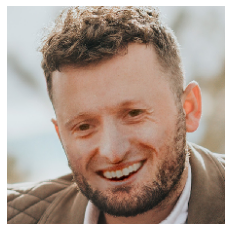

In [75]:
test_image_1 = ImagePrediction("check5.jpg")


1/1 [==============================] - 0s 58ms/step
[[0.9907799]]
Prediction:  Real


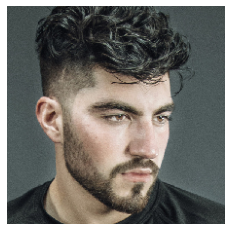

In [76]:
test_image_1 = ImagePrediction("real_00008.jpg")


1/1 [==============================] - 0s 52ms/step
[[0.]]
Prediction:  Fake


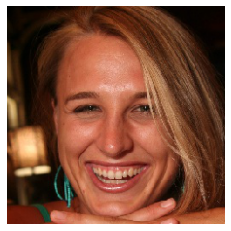

In [69]:
test_image_1 = ImagePrediction("140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/fake/00001.jpg")
